#### About

> Case study on product analytics

> Dataset - https://www.kaggle.com/datasets/lava18/google-play-store-apps

In [64]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore Future Warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Ignore Convergence Warnings
warnings.simplefilter("ignore", category=ConvergenceWarning)



In [2]:
df = pd.read_csv('/home/suraj/ClickUp/Mar-Apr/data/googleplaystore.csv')
df_eda = df

In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#### 1. Data Pre-processing

In [5]:
# Drop irrelevant columns
df = df.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)


In [6]:
# Remove rows with missing values
df = df.dropna()


In [7]:
# Convert size column to numeric
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('k', '') if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' not in str(x) and 'k' not in str(x) and str(x) != 'Varies with device' else x)
df['Size'] = df['Size'].apply(lambda x: float(x) if str(x) != 'Varies with device' else None)


In [8]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,7,2.6,500+,Free,0,Everyone,Education
10836,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education
10837,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education
10839,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference


In [9]:
# since Size column contains NaN values so we can either drop or replace with median values
#median_size = df['Size'].median()
#df['Size'] = df['Size'].fillna(median_size)
# we choose to drop
df.dropna(subset=['Size'], inplace=True)

In [10]:
# Convert installs column to numeric
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))


In [11]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,4.8,44,619.0,1000,Free,0,Everyone,Books & Reference
10834,FAMILY,4.0,7,2.6,500,Free,0,Everyone,Education
10836,FAMILY,4.5,38,53.0,5000,Free,0,Everyone,Education
10837,FAMILY,5.0,4,3.6,100,Free,0,Everyone,Education


In [12]:
# Convert price column to numeric
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x)
df['Price'] = df['Price'].apply(lambda x: float(x))

In [13]:
# Convert reviews column to numeric
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))


In [14]:
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Type'] = label_encoder.fit_transform(df['Type'])
df['Content Rating'] = label_encoder.fit_transform(df['Content Rating'])


In [15]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,159,19.0,10000,0,0.0,1,Art & Design
1,0,3.9,967,14.0,500000,0,0.0,1,Art & Design;Pretend Play
2,0,4.7,87510,8.7,5000000,0,0.0,1,Art & Design
3,0,4.5,215644,25.0,50000000,0,0.0,4,Art & Design
4,0,4.3,967,2.8,100000,0,0.0,1,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10833,3,4.8,44,619.0,1000,0,0.0,1,Books & Reference
10834,11,4.0,7,2.6,500,0,0.0,1,Education
10836,11,4.5,38,53.0,5000,0,0.0,1,Education
10837,11,5.0,4,3.6,100,0,0.0,1,Education


In [16]:
# check for non numeric columns
non_numeric_cols = df.select_dtypes(exclude='number').columns
print(non_numeric_cols)

Index(['Genres'], dtype='object')


In [17]:
df['Genres_list'] = df['Genres'].str.split(';')

In [18]:
df['Primary_Genre'] = df['Genres'].apply(lambda x: str(x).split(';')[0])

In [19]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Genres_list,Primary_Genre
0,0,4.1,159,19.0,10000,0,0.0,1,Art & Design,[Art & Design],Art & Design
1,0,3.9,967,14.0,500000,0,0.0,1,Art & Design;Pretend Play,"[Art & Design, Pretend Play]",Art & Design
2,0,4.7,87510,8.7,5000000,0,0.0,1,Art & Design,[Art & Design],Art & Design
3,0,4.5,215644,25.0,50000000,0,0.0,4,Art & Design,[Art & Design],Art & Design
4,0,4.3,967,2.8,100000,0,0.0,1,Art & Design;Creativity,"[Art & Design, Creativity]",Art & Design
...,...,...,...,...,...,...,...,...,...,...,...
10833,3,4.8,44,619.0,1000,0,0.0,1,Books & Reference,[Books & Reference],Books & Reference
10834,11,4.0,7,2.6,500,0,0.0,1,Education,[Education],Education
10836,11,4.5,38,53.0,5000,0,0.0,1,Education,[Education],Education
10837,11,5.0,4,3.6,100,0,0.0,1,Education,[Education],Education


In [20]:
# converting the primary genre to numeric
df['Primary_Genre_Encoded'] = pd.factorize(df['Primary_Genre'])[0]


In [21]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Genres_list,Primary_Genre,Primary_Genre_Encoded
0,0,4.1,159,19.0,10000,0,0.0,1,Art & Design,[Art & Design],Art & Design,0
1,0,3.9,967,14.0,500000,0,0.0,1,Art & Design;Pretend Play,"[Art & Design, Pretend Play]",Art & Design,0
2,0,4.7,87510,8.7,5000000,0,0.0,1,Art & Design,[Art & Design],Art & Design,0
3,0,4.5,215644,25.0,50000000,0,0.0,4,Art & Design,[Art & Design],Art & Design,0
4,0,4.3,967,2.8,100000,0,0.0,1,Art & Design;Creativity,"[Art & Design, Creativity]",Art & Design,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10833,3,4.8,44,619.0,1000,0,0.0,1,Books & Reference,[Books & Reference],Books & Reference,3
10834,11,4.0,7,2.6,500,0,0.0,1,Education,[Education],Education,8
10836,11,4.5,38,53.0,5000,0,0.0,1,Education,[Education],Education,8
10837,11,5.0,4,3.6,100,0,0.0,1,Education,[Education],Education,8


In [22]:
# drop irreleavant columns
df = df.drop(['Genres', 'Genres_list', 'Primary_Genre'], axis=1)

In [23]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Primary_Genre_Encoded
0,0,4.1,159,19.0,10000,0,0.0,1,0
1,0,3.9,967,14.0,500000,0,0.0,1,0
2,0,4.7,87510,8.7,5000000,0,0.0,1,0
3,0,4.5,215644,25.0,50000000,0,0.0,4,0
4,0,4.3,967,2.8,100000,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...
10833,3,4.8,44,619.0,1000,0,0.0,1,3
10834,11,4.0,7,2.6,500,0,0.0,1,8
10836,11,4.5,38,53.0,5000,0,0.0,1,8
10837,11,5.0,4,3.6,100,0,0.0,1,8


In [24]:
df.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Primary_Genre_Encoded'],
      dtype='object')

#### 2. Feature Engineering

In [25]:
#Create a new feature that calculates the ratio of the number of installs to the number of reviews.
df['Installs_per_Review'] = df['Installs'] / df['Reviews']

In [26]:
#Create a new feature that categorizes apps based on their size. 
df['Size_Category'] = pd.cut(df['Size'], bins=[0, 10, 50, 100, 500, 1000, np.inf], labels=['XS', 'S', 'M', 'L', 'XL', 'XXL'])

In [27]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Primary_Genre_Encoded,Installs_per_Review,Size_Category
0,0,4.1,159,19.0,10000,0,0.0,1,0,62.893082,S
1,0,3.9,967,14.0,500000,0,0.0,1,0,517.063082,S
2,0,4.7,87510,8.7,5000000,0,0.0,1,0,57.136327,XS
3,0,4.5,215644,25.0,50000000,0,0.0,4,0,231.863627,S
4,0,4.3,967,2.8,100000,0,0.0,1,0,103.412616,XS
...,...,...,...,...,...,...,...,...,...,...,...
10833,3,4.8,44,619.0,1000,0,0.0,1,3,22.727273,XL
10834,11,4.0,7,2.6,500,0,0.0,1,8,71.428571,XS
10836,11,4.5,38,53.0,5000,0,0.0,1,8,131.578947,M
10837,11,5.0,4,3.6,100,0,0.0,1,8,25.000000,XS


In [28]:
le = LabelEncoder()
df['Size_category_encoded'] = le.fit_transform(df['Size_Category'])
df['Size_category_encoded'] = df['Size_category_encoded'].astype(float)

In [29]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Primary_Genre_Encoded,Installs_per_Review,Size_Category,Size_category_encoded
0,0,4.1,159,19.0,10000,0,0.0,1,0,62.893082,S,2.0
1,0,3.9,967,14.0,500000,0,0.0,1,0,517.063082,S,2.0
2,0,4.7,87510,8.7,5000000,0,0.0,1,0,57.136327,XS,4.0
3,0,4.5,215644,25.0,50000000,0,0.0,4,0,231.863627,S,2.0
4,0,4.3,967,2.8,100000,0,0.0,1,0,103.412616,XS,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10833,3,4.8,44,619.0,1000,0,0.0,1,3,22.727273,XL,3.0
10834,11,4.0,7,2.6,500,0,0.0,1,8,71.428571,XS,4.0
10836,11,4.5,38,53.0,5000,0,0.0,1,8,131.578947,M,1.0
10837,11,5.0,4,3.6,100,0,0.0,1,8,25.000000,XS,4.0


In [30]:
# drop irreleavant columns
df = df.drop(['Size_Category'], axis=1)

In [31]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Primary_Genre_Encoded,Installs_per_Review,Size_category_encoded
0,0,4.1,159,19.0,10000,0,0.0,1,0,62.893082,2.0
1,0,3.9,967,14.0,500000,0,0.0,1,0,517.063082,2.0
2,0,4.7,87510,8.7,5000000,0,0.0,1,0,57.136327,4.0
3,0,4.5,215644,25.0,50000000,0,0.0,4,0,231.863627,2.0
4,0,4.3,967,2.8,100000,0,0.0,1,0,103.412616,4.0
...,...,...,...,...,...,...,...,...,...,...,...
10833,3,4.8,44,619.0,1000,0,0.0,1,3,22.727273,3.0
10834,11,4.0,7,2.6,500,0,0.0,1,8,71.428571,4.0
10836,11,4.5,38,53.0,5000,0,0.0,1,8,131.578947,1.0
10837,11,5.0,4,3.6,100,0,0.0,1,8,25.000000,4.0


In [53]:
df.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Primary_Genre_Encoded', 'Installs_per_Review',
       'Size_category_encoded'],
      dtype='object')

#### 3. EDA

In [32]:
# Check the data types and missing values
print(df_eda.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


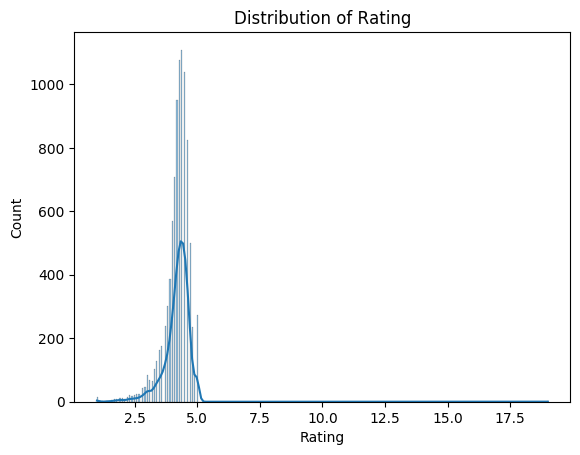

In [33]:
# Distribution of target variable Rating
sns.histplot(df_eda['Rating'], kde=True)
plt.title('Distribution of Rating')
plt.show()


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


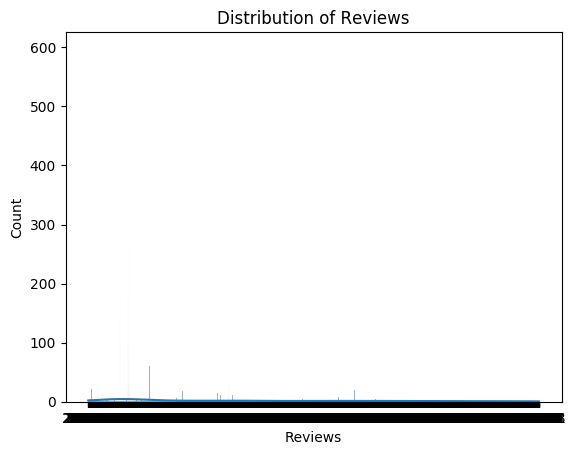

In [34]:
# Distribution of Reviews
sns.histplot(df_eda['Reviews'], kde=True)
plt.title('Distribution of Reviews')
plt.show()


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


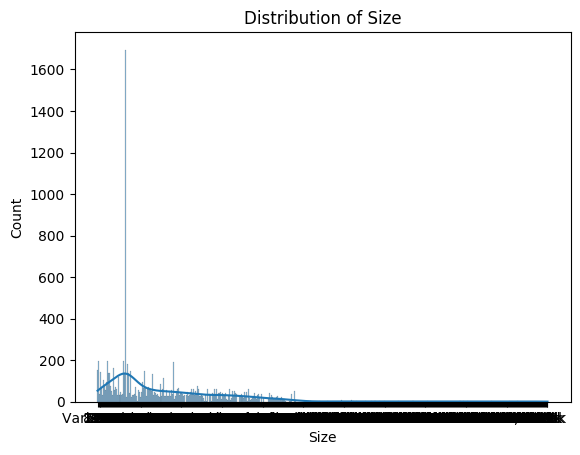

In [35]:
# Distribution of Size
sns.histplot(df_eda['Size'], kde=True)
plt.title('Distribution of Size')
plt.show()

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


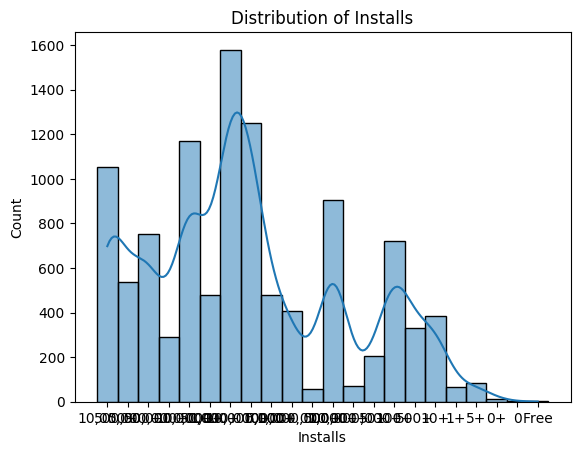

In [36]:
# Distribution of Installs
sns.histplot(df_eda['Installs'], kde=True)
plt.title('Distribution of Installs')
plt.show()


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


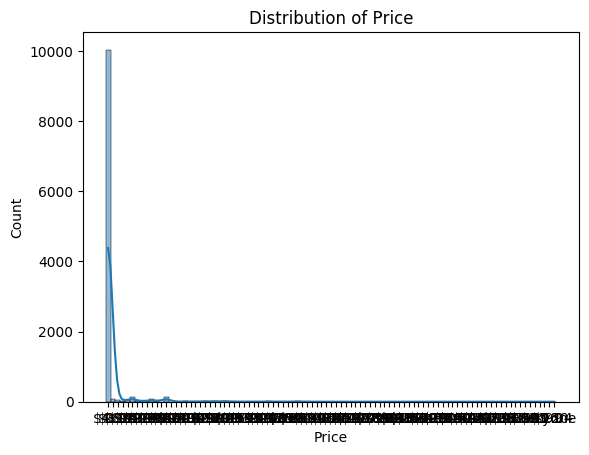

In [37]:
# Distribution of Price
sns.histplot(df_eda['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()


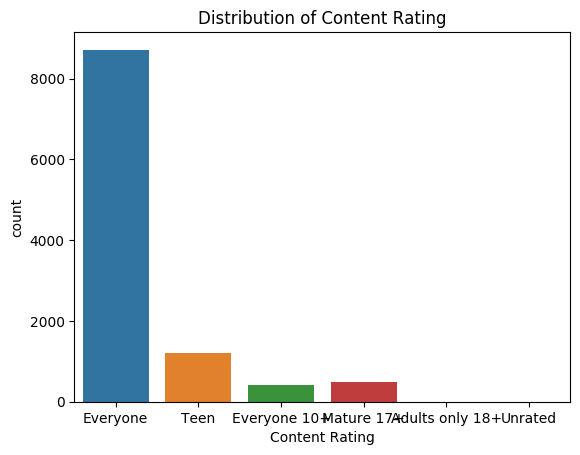

In [38]:
# Distribution of Content Rating
sns.countplot(x='Content Rating', data=df_eda)
plt.title('Distribution of Content Rating')
plt.show()

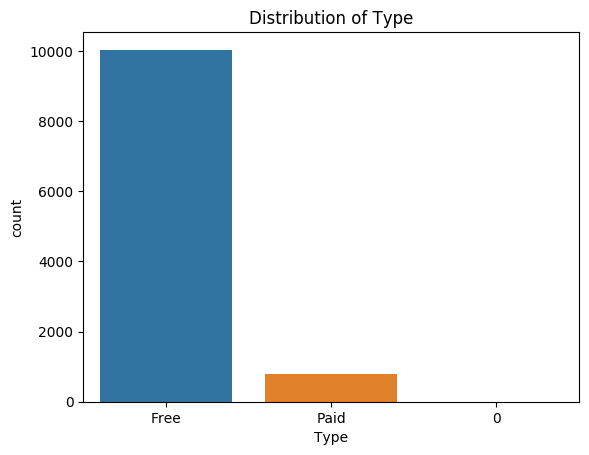

In [39]:
# Distribution of Type
sns.countplot(x='Type', data=df_eda)
plt.title('Distribution of Type')
plt.show()


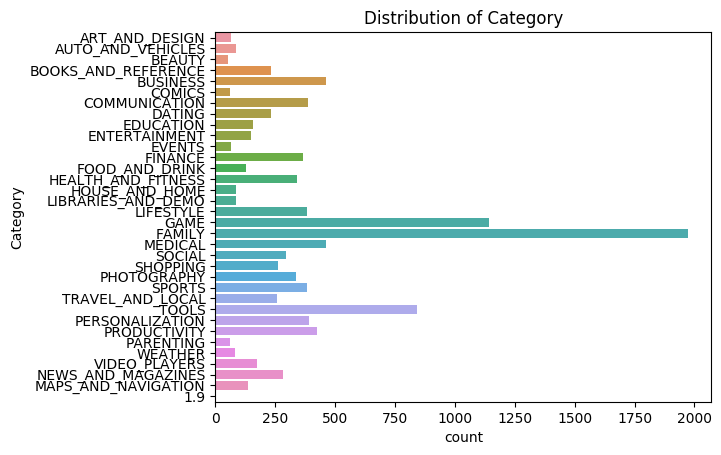

In [40]:
# Distribution of Category
sns.countplot(y='Category', data=df_eda)
plt.title('Distribution of Category')
plt.show()

In [41]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Primary_Genre_Encoded,Installs_per_Review,Size_category_encoded
0,0,4.1,159,19.0,10000,0,0.0,1,0,62.893082,2.0
1,0,3.9,967,14.0,500000,0,0.0,1,0,517.063082,2.0
2,0,4.7,87510,8.7,5000000,0,0.0,1,0,57.136327,4.0
3,0,4.5,215644,25.0,50000000,0,0.0,4,0,231.863627,2.0
4,0,4.3,967,2.8,100000,0,0.0,1,0,103.412616,4.0
...,...,...,...,...,...,...,...,...,...,...,...
10833,3,4.8,44,619.0,1000,0,0.0,1,3,22.727273,3.0
10834,11,4.0,7,2.6,500,0,0.0,1,8,71.428571,4.0
10836,11,4.5,38,53.0,5000,0,0.0,1,8,131.578947,1.0
10837,11,5.0,4,3.6,100,0,0.0,1,8,25.000000,4.0


In [56]:
df.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Primary_Genre_Encoded', 'Installs_per_Review',
       'Size_category_encoded'],
      dtype='object')

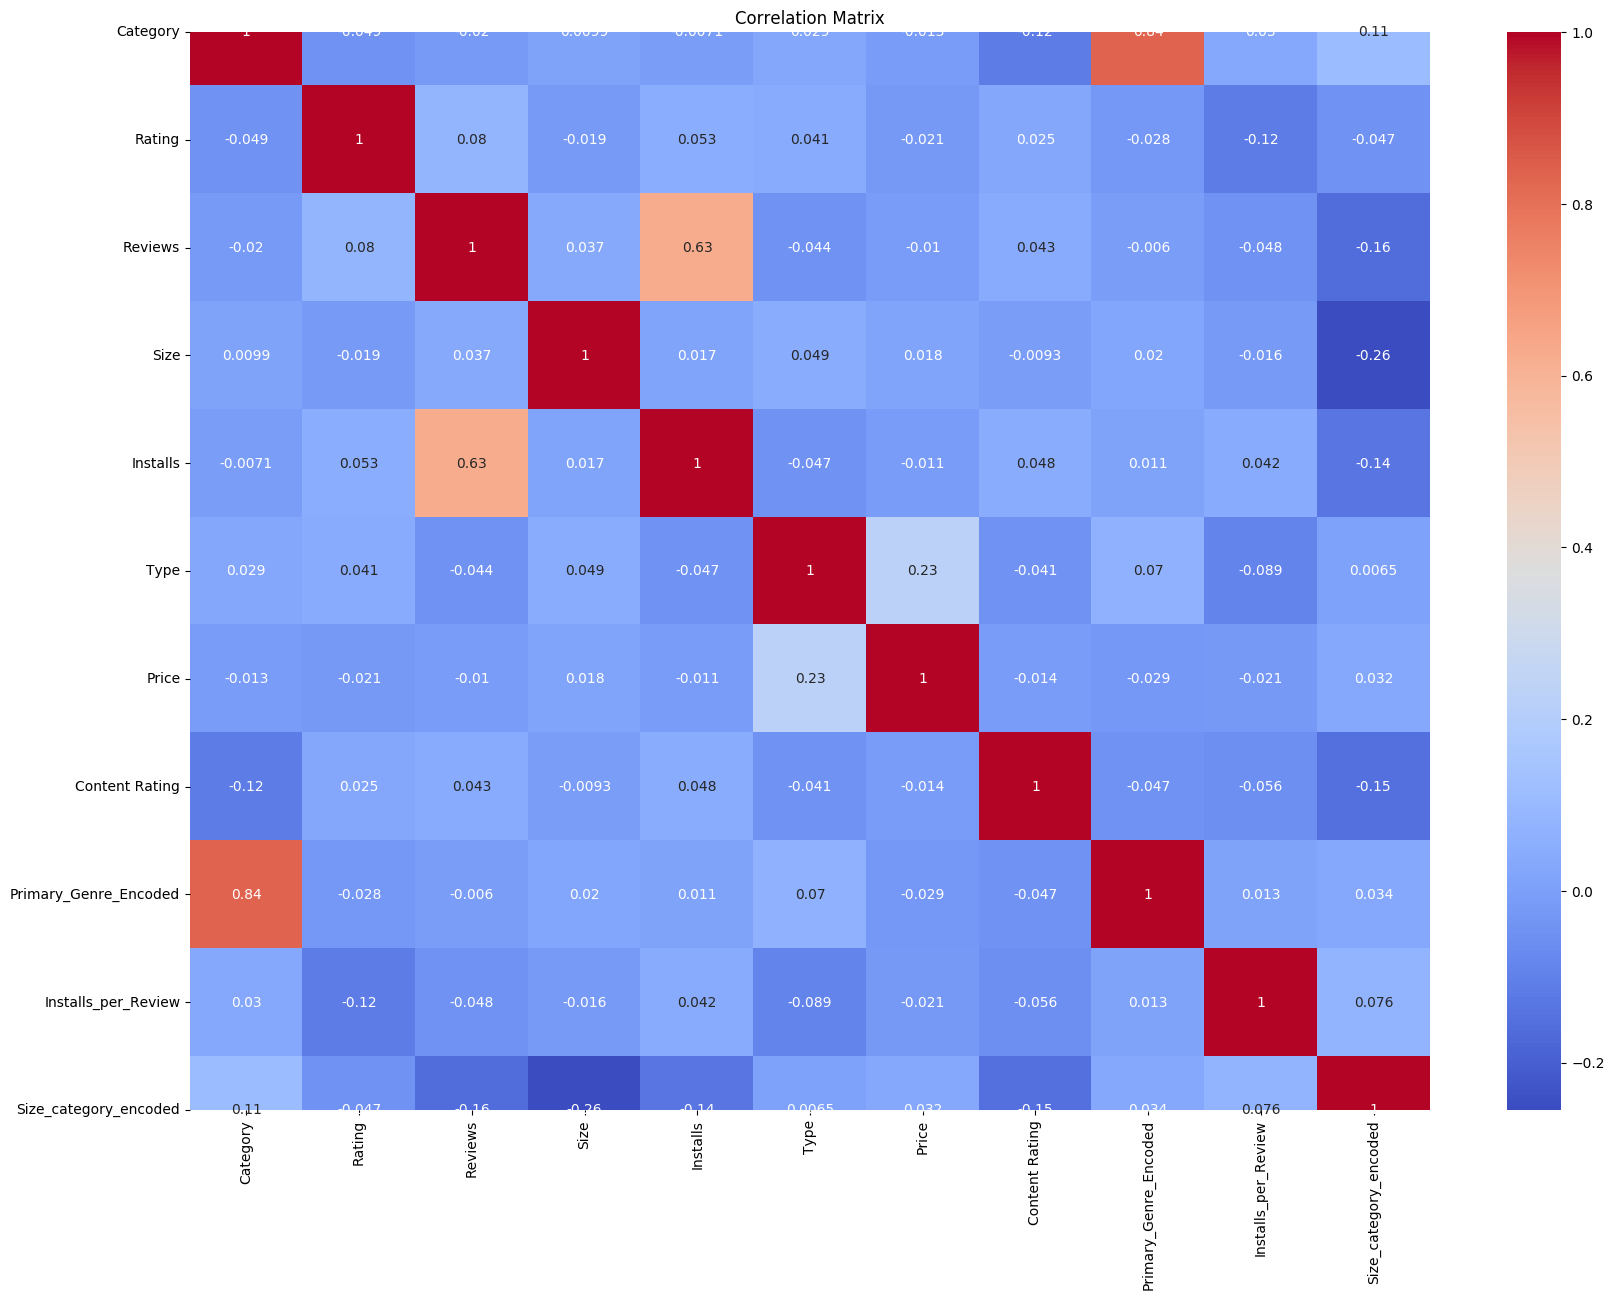

In [48]:
# Correlation Matrix
corr = df.corr()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(20,14))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix')
plt.show()


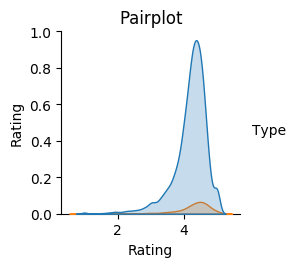

In [43]:
# Pairplot
sns.pairplot(df_eda, hue='Type')
plt.title('Pairplot')
plt.show()

#### 4. Model Selection

In [57]:
# Splitting the data into train and test sets
X = df.drop(['Rating'], axis=1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R2 Score:", lr_r2)
print("Linear Regression RMSE:", lr_rmse)


Linear Regression R2 Score: -0.00652329464736745
Linear Regression RMSE: 0.5510771594695479


In [61]:
# Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_r2 = r2_score(y_test, y_pred_dt)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print("Decision Tree Regressor R2 Score:", dt_r2)
print("Decision Tree Regressor RMSE:", dt_rmse)

Decision Tree Regressor R2 Score: -0.507093546967482
Decision Tree Regressor RMSE: 0.6743270806092171


In [62]:
# Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest Regressor R2 Score:", rf_r2)
print("Random Forest Regressor RMSE:", rf_rmse)


Random Forest Regressor R2 Score: 0.12433224152557065
Random Forest Regressor RMSE: 0.5140083518693943


In [63]:
# Neural Network model
nn_model = MLPRegressor(random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
nn_r2 = r2_score(y_test, y_pred_nn)
nn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_nn))
print("Neural Network R2 Score:", nn_r2)
print("Neural Network RMSE:", nn_rmse)

Neural Network R2 Score: -92706278.25960347
Neural Network RMSE: 5288.774759249111


The R-squared (R2) score measures how well the predictions of a regression model fit the actual values of the dependent variable. It represents the proportion of variance in the target variable that is explained by the independent variables.

A negative R2 score indicates that the model performs worse than a model that simply predicts the mean value of the target variable. This means that the model is not capturing the relationships between the independent and dependent variables and is producing predictions that are not better than random guessing.

A positive R2 score indicates that the model is performing better than a model that simply predicts the mean value of the target variable. It means that the model is capturing some of the relationships between the independent and dependent variables and is producing predictions that are better than random guessing. A higher positive R2 score indicates a better fit of the model to the data.

In general, we want the R2 score to be as close to 1 as possible for a better fit of the model to the data. 

#### 5. Model tuning

Tuning the best performing model

In [65]:
# define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create a random forest regressor object
rf = RandomForestRegressor(random_state=42)

# create a grid search object
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# get the best model from the grid search
best_model = grid_search.best_estimator_

# predict on the test set using the best model
y_pred = best_model.predict(X_test)

# calculate the R^2 score on the test set
r2 = r2_score(y_test, y_pred)

# print the best parameters and R^2 score
print('Best parameters:', grid_search.best_params_)
print('R^2 score:', r2)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   4.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   4.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   5.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   5.1s
[CV] END max_depth=5, min_samples_lea

#### 6. Model Interpretation

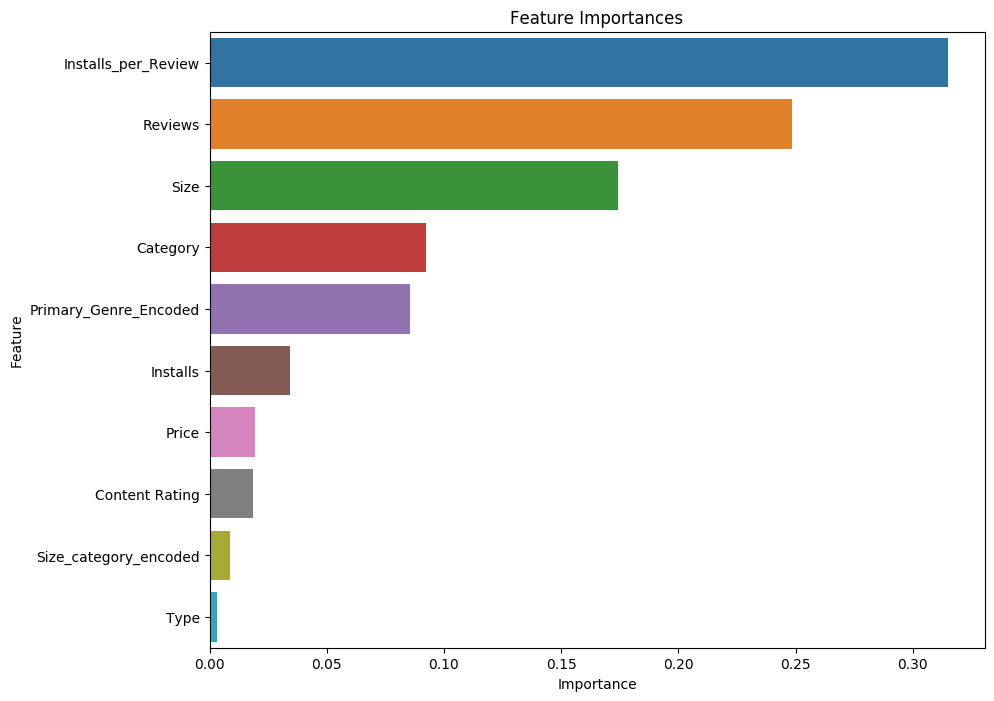

In [66]:
# extract feature importances from the best model
importances = best_model.feature_importances_

# create a list of feature names
feature_names = X_train.columns.tolist()

# create a dataframe with feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# sort the dataframe by feature importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [67]:
feature_importances

,Feature,Importance
8,Installs_per_Review,0.314836
1,Reviews,0.248290
2,Size,0.174334
0,Category,0.092501
7,Primary_Genre_Encoded,0.085666
3,Installs,0.034491
5,Price,0.019514
6,Content Rating,0.018735
9,Size_category_encoded,0.008625
4,Type,0.003009


#### 7. Recommendations

Based on the feature importance matrix, the top three features that influence the rating of an app are:

1. Installs_per_Review: This feature has the highest importance and implies that apps with a higher ratio of installs to reviews tend to have a higher rating. This could be because apps with a higher ratio of installs to reviews have a larger user base and are more popular among users.

2. Reviews: This feature has the second-highest importance and implies that apps with more reviews tend to have a higher rating. This could be because apps with more reviews have been used by more people and have received more feedback, leading to a better understanding of user needs and preferences.

3. Size: This feature has the third-highest importance and implies that smaller-sized apps tend to have a higher rating. This could be because smaller-sized apps are easier to download, install, and use and may be less likely to have performance issues.

Based on these findings, some recommendations to improve the rating of an app are:

1. Increase the number of installs relative to the number of reviews by encouraging users to rate the app after they have used it. This can be done by providing incentives or reminders to users to rate the app.

2. Encourage users to leave reviews by providing a seamless and user-friendly review process. This can include providing clear instructions on how to leave a review and making the review process as easy as possible.

3. Optimize the app size by removing unnecessary features or compressing files to reduce the overall size of the app. This can help to improve user experience and reduce the likelihood of performance issues.

